<a href="https://colab.research.google.com/github/emartineznunez/latex/blob/master/kinetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript javascript-common
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libharfbuzz-icu0 libidn11
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpdfbox-java
  libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data preview-latex-style
  rake ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-pictures texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fon

green
red
blue


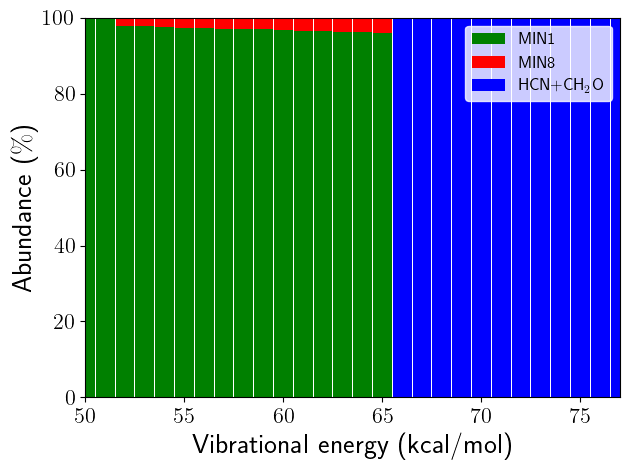

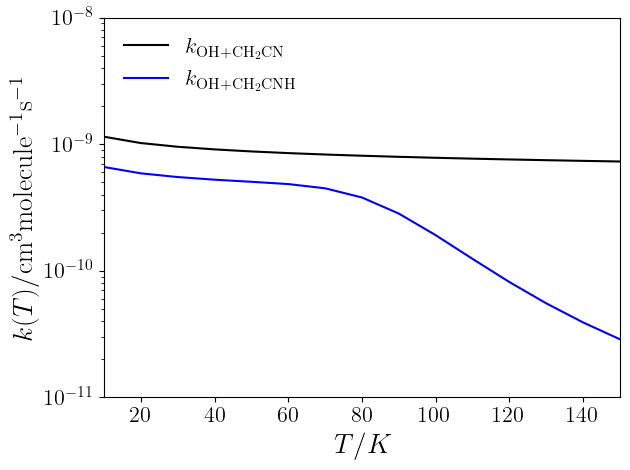

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d


#reading the conductivities from a file
kin = pd.read_csv("kinetics.csv",sep=',')
X = np.array(kin['Energy'].values)
MIN1 = np.array(kin['MIN1'].values)
MIN8 = np.array(kin['MIN8'].values)
HCN_ = np.array(kin['HCN+CH2O'].values)

#X_ = np.linspace(X.min(), X.max(), 500)

#min1_interp = make_interp_spline(X,MIN1,k=3)
#min1_ = min1_interp(X_)


###############

species = X
sex_counts = {
    'MIN1': MIN1,
    'MIN8': MIN8,
    'HCN+CH$_{2}$O': HCN_,
}
width = 0.95  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(len(X))

color = ['green','red','blue']
i=0
for sex, sex_count in sex_counts.items():
    print(color[i])
    p = ax.bar(species, sex_count, width, label=sex, color=color[i], bottom=bottom)
    bottom += sex_count
    i+=1

    #ax.bar_label(p, label_type='center')
    #ax.bar_label(p, labels=None)


#plt.legend(loc=0,frameon=False,fontsize=12,edgecolor='white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([50,77])
plt.ylim([0,100])
plt.xlabel(r'Vibrational energy (kcal/mol)',fontsize=20)
plt.ylabel(r'Abundance ($\%$)',fontsize=20)
#plt.show()

plt.legend(loc=1,fontsize=12,edgecolor='white')

############

#min8_interp = make_interp_spline(X,MIN8)
#min8_ = min8_interp(X_)

#hcn_interp = make_interp_spline(X,HCN_)
#hcn_ = hcn_interp(X_)

#min1_[min1_ > 100] = 100
#min8_[min8_ < 0] = 0


plt.rcParams['text.usetex'] = True

#plt.plot(X,MIN1, '-',color='black',label='MIN1')
#plt.plot(X,MIN8, '-',color='red',label='MIN8')
#plt.plot(X,HCN_, '-',color='blue',label='HCN+CH$_{2}$O')


#plt.xlabel(r'Vibrational energy (kcal/mol)',fontsize=20)
#plt.ylabel(r'Abundance ($\%$)',fontsize=20)

#plt.yscale('log')

#plt.legend(loc=1,frameon=False,fontsize=12)
#plt.xlim([50,77])
#plt.ylim([-1,101])
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('GLN',x=0.8, y=0.8, fontsize=16)
plt.tight_layout()
plt.savefig('kinetics.svg')
#plt.show()


plt.show()



#reading the conductivities from a file
k_rm = pd.read_csv("k_rad-mol.csv",sep=',')
temp = np.array(k_rm['T(K)'].values)
krm = np.array(k_rm['kCCUS'].values)

k_rr = pd.read_csv("k_rad-rad.csv",sep=',')
krr = np.array(k_rr['kCCUS'].values)


plt.rcParams['text.usetex'] = True
plt.rcParams.update({'figure.autolayout':True})

plt.plot(temp,krr, '-',color='black', label='$k_{\mathrm{OH+CH_{2}CN}}$')
plt.plot(temp,krm, '-',color='blue', label='$k_{\mathrm{OH+CH_{2}CNH}}$')



plt.xlabel('$T/K$',fontsize=20)
plt.ylabel('$k(T)/ \mathrm{cm^{3}molecule^{-1}s^{-1}}$',fontsize=20)

plt.xlim([10,150])
plt.ylim([1e-11,1e-8])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('GLN',x=0.8, y=0.8, fontsize=16)
plt.tight_layout()
plt.yscale("log")
plt.legend(loc=2,fontsize=16,edgecolor='white')
plt.savefig('rate.svg')


plt.show()


In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cm-super is already the newest version (0.3.4-15).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-fonts-recommended set to manually installed.
The following additional packages will be installed:
  fonts-adf-accanthis fonts-adf-berenis fonts-adf-gillius
  fonts-adf-universalis fonts-cabin fonts-cantarell fonts-comfortaa
  fonts-croscore fonts-crosextra-caladea fonts-crosextra-carlito
  fonts-dejavu-core fonts-dejavu-extra fonts-ebgaramond fonts-ebgaramond-extra
  fonts-font-awesome fonts-freefont-otf fonts-freefont-ttf fonts-gfs-artemisia
  fonts-gfs-complutum fonts-gfs-didot fonts-gfs-neohellenic fonts-gfs-olga
  fonts-gfs-solomos fonts-go fonts-junicode fonts-linuxlibertine fonts-lobster
  fonts-lobstertwo fonts-noto-core fonts-oflb-asana-math fonts-open-sans
  fonts-roboto-unhinted fonts-sil-gentium fonts